# HW5 clustering ( 50 pts )

## Please restart the kernel and run all before you submit

## Your name: Anshika


The goal of this homework is to implement several clustering algorithms using some datasets.

**Requirements:**
1. You should include k-means, spectral clustering, DBSCAN, and Hierarchical clustering in your solution.
2. For Hierarchical clustering, you should use at least 3 different similarity criteria. 
3. You should also try another clustering algorithm which is not covered in the lecture. You should write a short paragraph to explain the theory of the algorithm you select.
4. Visualize your results like given sample plot.
5. You should carefully choose the hyperparameters (e.g. number of clusters, scale of kernels in spectral clustering). Please clearly state your choices for each model and each dataset, and then explain your choices.


**Grading items:**
1. Your codes are correct and accompanied with comments.
2. Your visualization results.
3. Hyperparameter selection and reasoning.

**Dataset:** (for the first three datasets, you should not use the last column when you run clustering algorithms)
1. Aggregation: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/Aggregation.txt"
2. jain: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/jain.txt"
3. R15: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/R15.txt"
4. circle: url="https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/circle.csv"

**Sample plot:**
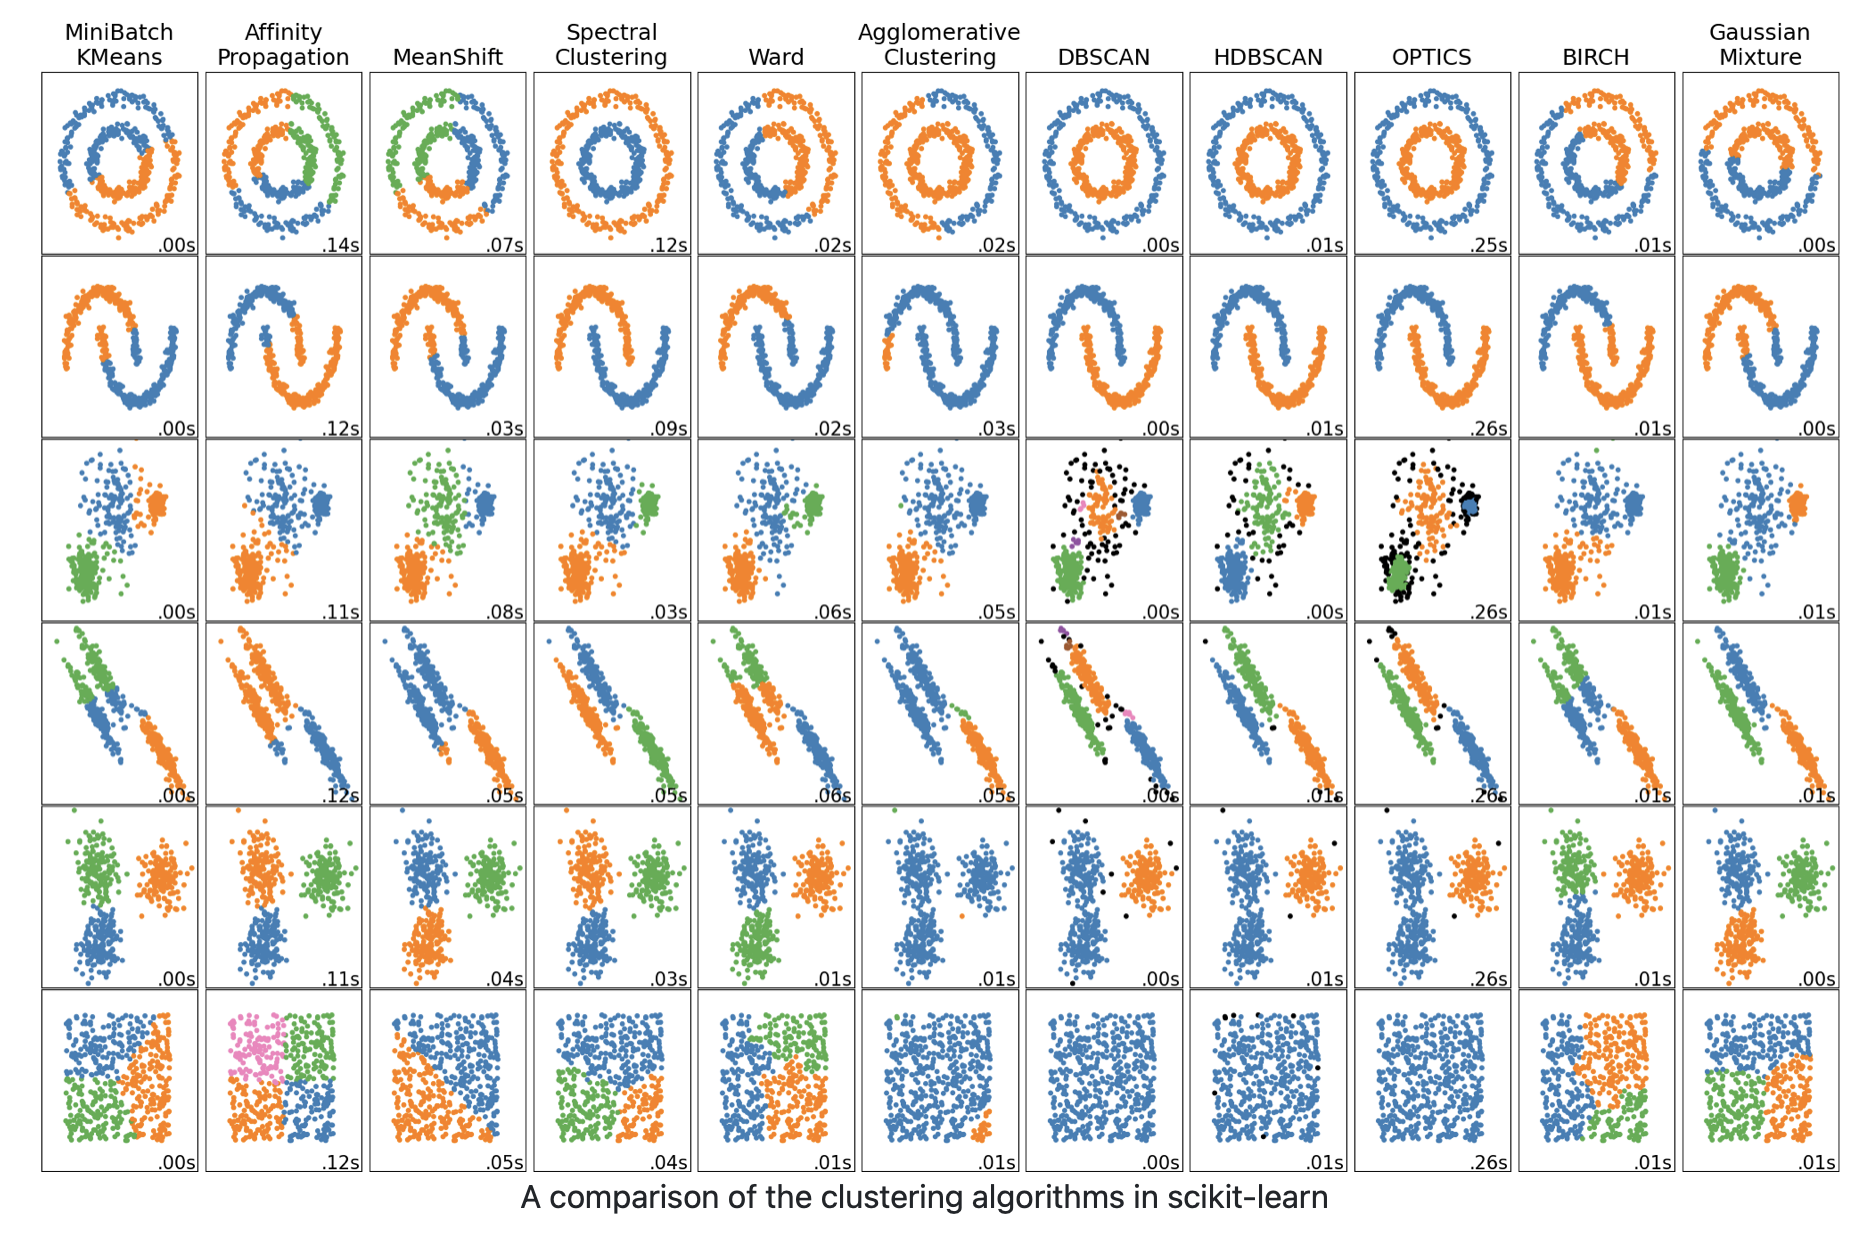

**Computation times are also included in my sample plots, you do NOT need to include them.**

In [1]:
# import packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# creating the pandas dataframes from the csv files
aggregation_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/Aggregation.txt", sep = '\t')
jain_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/jain.txt", sep = '\t')
R15_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/R15.txt", sep = '\t')
circle_df = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/05_Clustering/circle.csv")

In [3]:
aggregation_df

15.55  28.65  2
0    14.90  27.55  2
1    14.45  28.35  2
2    14.15  28.80  2
3    13.75  28.05  2
4    13.35  28.45  2
..     ...    ... ..
782   7.80   3.35  5
783   8.05   2.75  5
784   8.50   3.25  5
785   8.10   3.55  5
786   8.15   4.00  5

[787 rows x 3 columns]

In [4]:
jain_df

0.85  17.45  2
0     0.75  15.60  2
1     3.30  15.45  2
2     5.25  14.20  2
3     4.90  15.65  2
4     5.35  15.85  2
..     ...    ... ..
367  38.75  16.85  1
368  39.00  16.60  1
369  38.25  17.35  1
370  39.50  16.95  1
371  39.90  17.05  1

[372 rows x 3 columns]

In [5]:
R15_df

9.802  10.132   1
0    10.350   9.768   1
1    10.098   9.988   1
2     9.730   9.910   1
3     9.754  10.430   1
4     9.836   9.902   1
..      ...     ...  ..
594  14.198   4.804  15
595  14.320   4.590  15
596  13.636   5.218  15
597  14.410   4.656  15
598  14.020   5.614  15

[599 rows x 3 columns]

In [6]:
circle_df

x         y
0   -0.058863  0.998266
1   -0.897921  0.440157
2    0.999984  0.005675
3    0.905323  0.424723
4    0.147173  0.989111
..        ...       ...
145  0.940674 -2.848707
146 -2.153463  2.088683
147 -1.441313 -2.631087
148 -2.952578  0.531302
149 -0.885019 -2.866486

[150 rows x 2 columns]

# Aggregation Data

## kMeans

In [7]:
X = aggregation_df.drop(aggregation_df.columns[-1], axis=1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [8]:
y_kmeans = kmeans.predict(X)

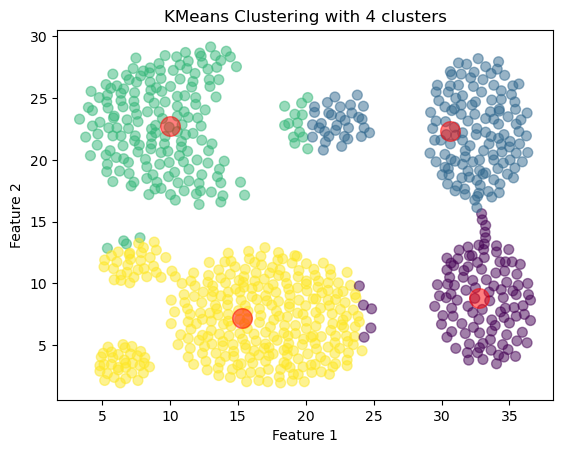

In [9]:
# Visualize the clusters along with centroids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


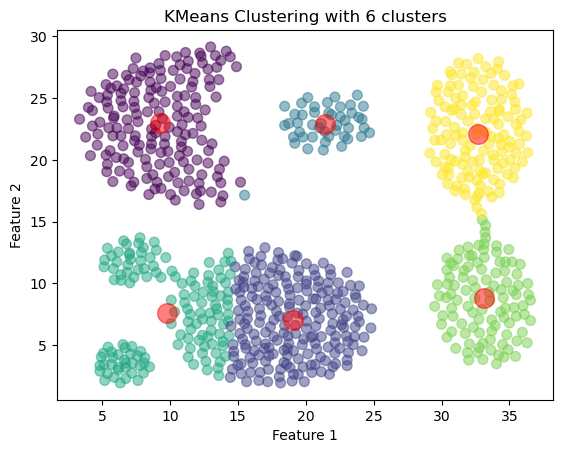

In [11]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 6 clusters')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


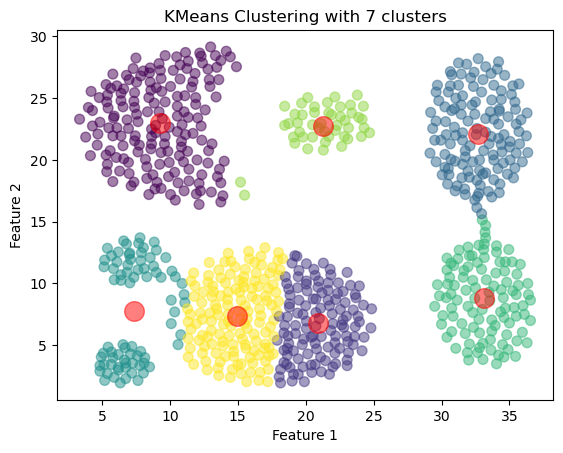

In [13]:
# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 7 clusters')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


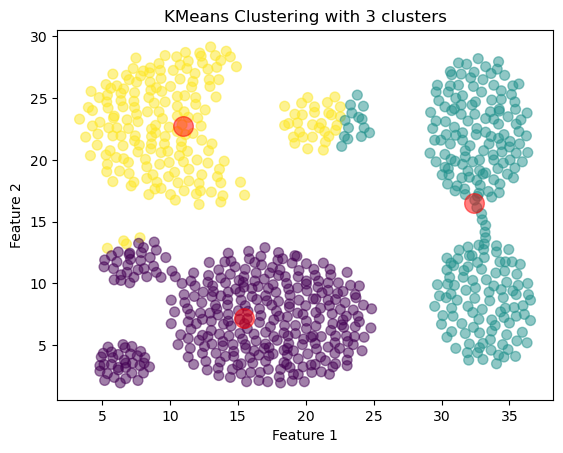

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

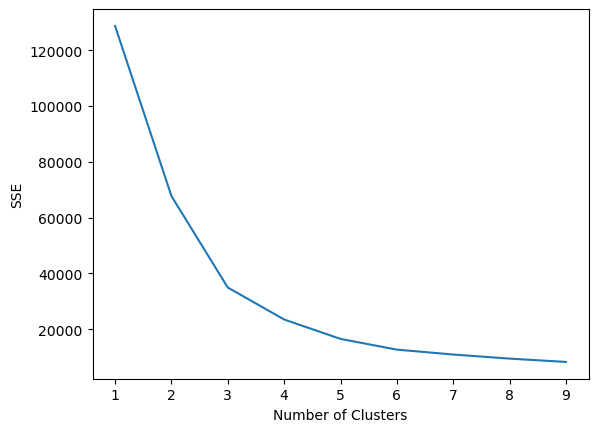

In [15]:
sse = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Spectral Clustering

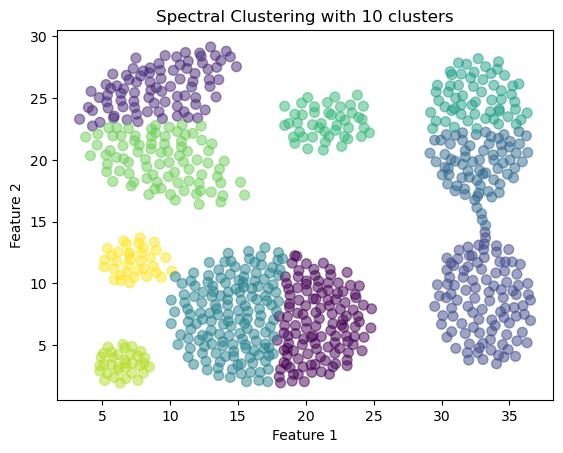

In [16]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=10)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 10 clusters')
plt.show()

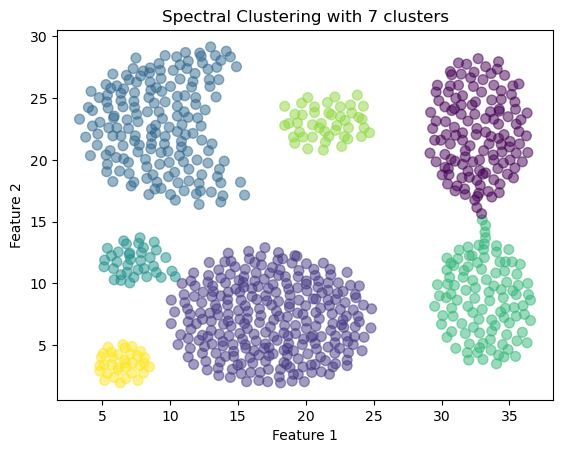

In [17]:
spectral = SpectralClustering(n_clusters=7)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 7 clusters')
plt.show()

## DBSCAN

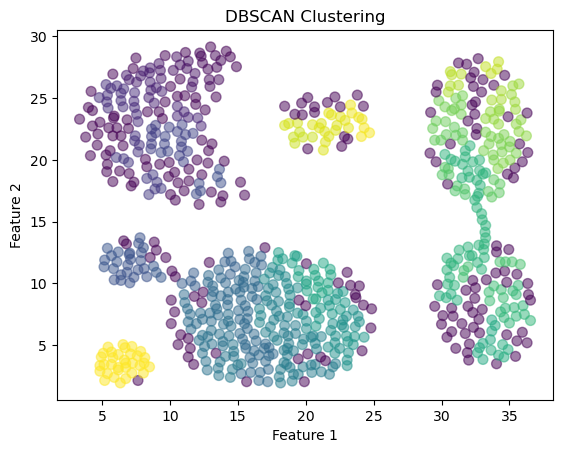

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.71, min_samples=3)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

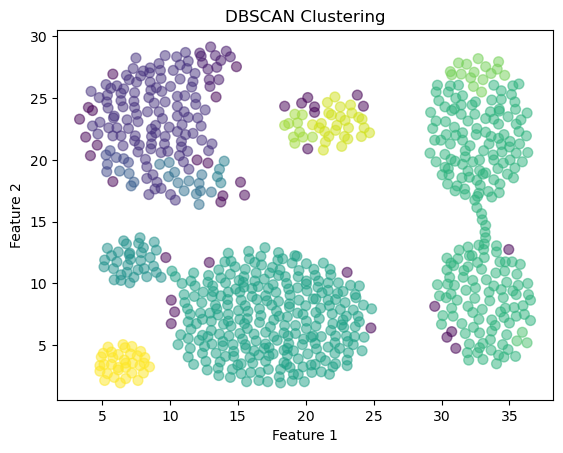

In [19]:
dbscan = DBSCAN(eps=0.90, min_samples=3)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial 

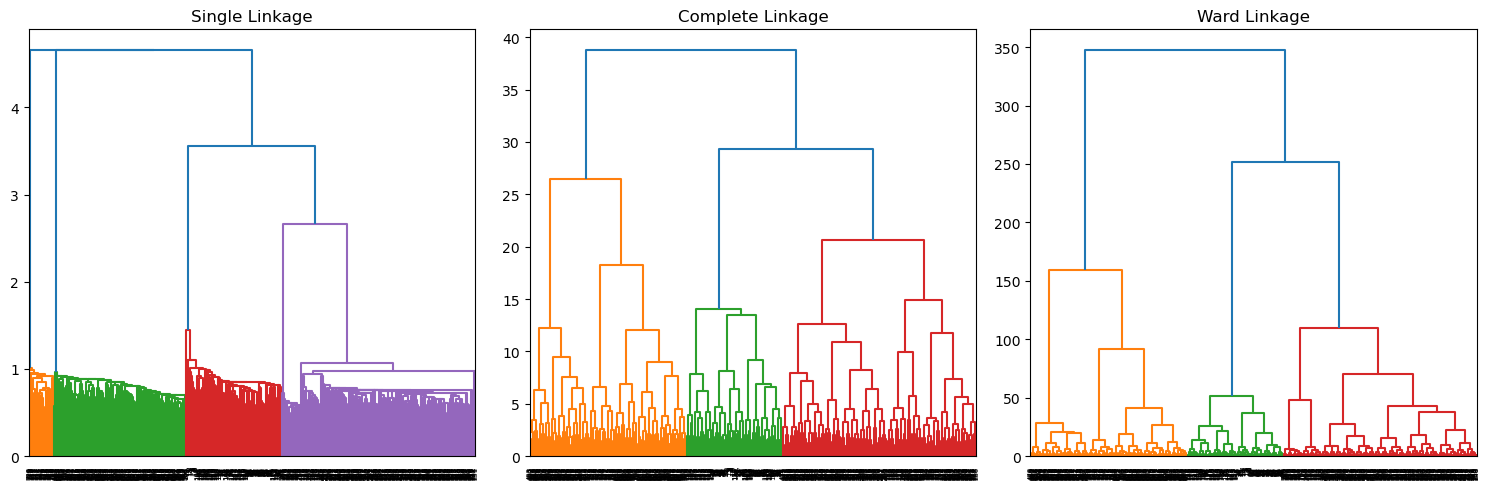

In [20]:
from scipy.cluster import hierarchy

linkage_methods = ['single', 'complete', 'ward']

# Plot dendrograms for different linkage methods
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, method in enumerate(linkage_methods):
    Z = hierarchy.linkage(X, method=method)
    hierarchy.dendrogram(Z, ax=axes[i])
    axes[i].set_title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

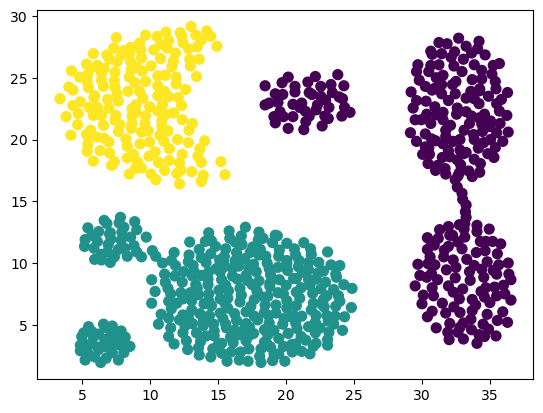

In [21]:
from sklearn.cluster import AgglomerativeClustering
X = np.array(X)
hc = AgglomerativeClustering(n_clusters = 3, linkage='complete')
y_hc = hc.fit_predict(X)
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y_hc, s=50)

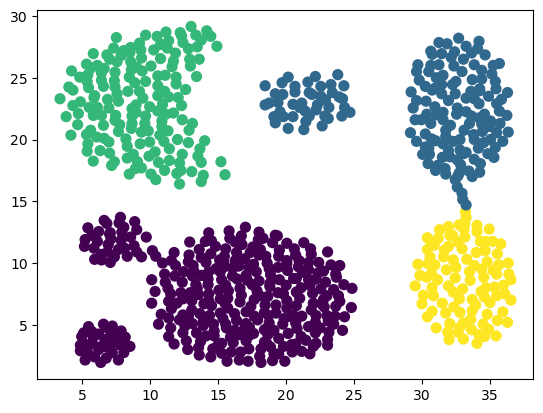

In [22]:
from sklearn.cluster import AgglomerativeClustering
X = np.array(X)
hc = AgglomerativeClustering(n_clusters = 4, linkage='ward')
y_hc = hc.fit_predict(X)
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y_hc, s=50)

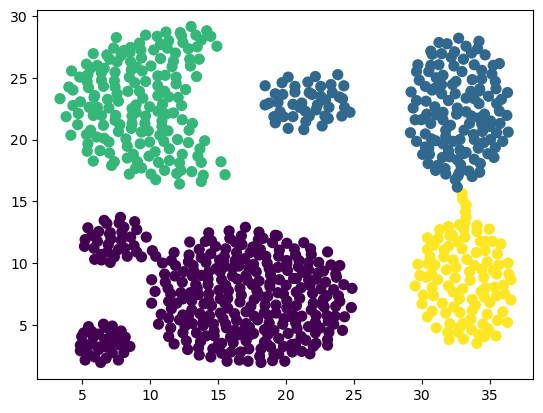

In [23]:
from sklearn.cluster import AgglomerativeClustering
X = np.array(X)
hc = AgglomerativeClustering(n_clusters = 4, linkage='complete')
y_hc = hc.fit_predict(X)
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y_hc, s=50)

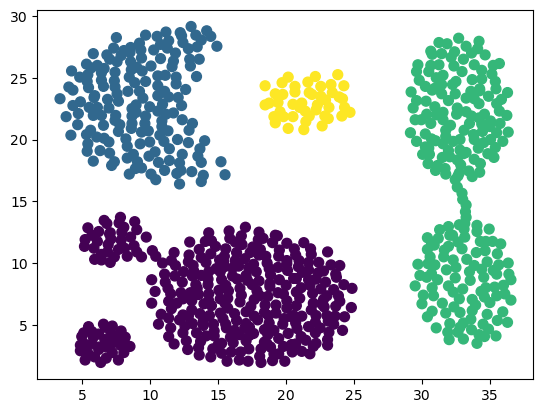

In [24]:
from sklearn.cluster import AgglomerativeClustering
X = np.array(X)
hc = AgglomerativeClustering(n_clusters = 4, linkage='single')
y_hc = hc.fit_predict(X)
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:,1], c=y_hc, s=50)

## Guassian Mixture

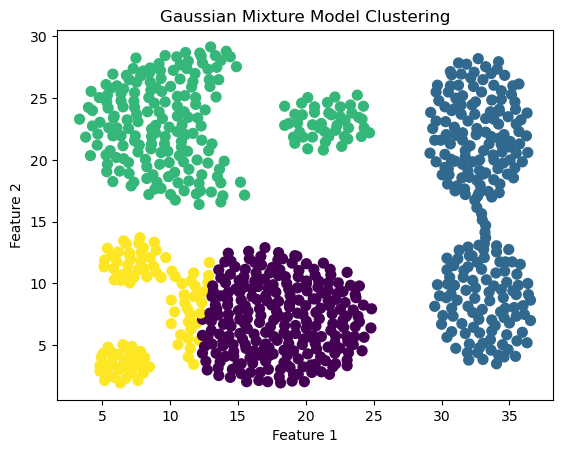

In [25]:
from sklearn.mixture import GaussianMixture

X = np.asarray(X)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)

# Predict the cluster labels
y_gmm = gmm.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

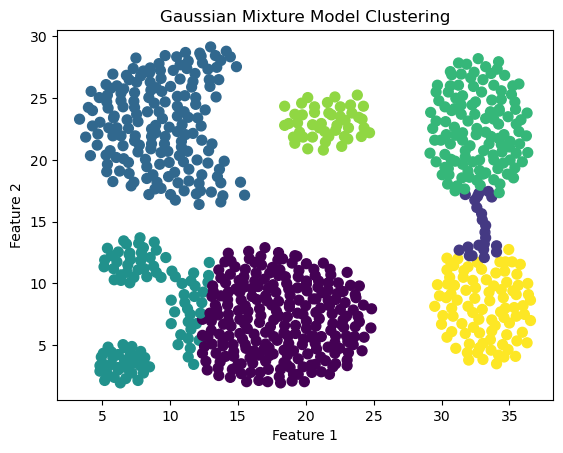

In [26]:
X = np.asarray(X)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=7, random_state=0)
gmm.fit(X)

# Predict the cluster labels
y_gmm = gmm.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

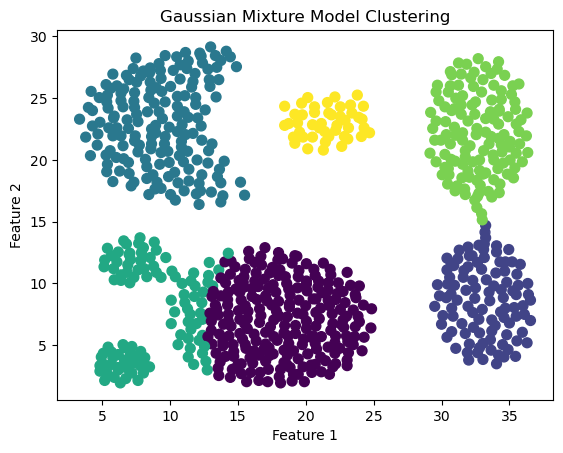

In [27]:
X = np.asarray(X)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=6, random_state=0)
gmm.fit(X)

# Predict the cluster labels
y_gmm = gmm.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Jain Data

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


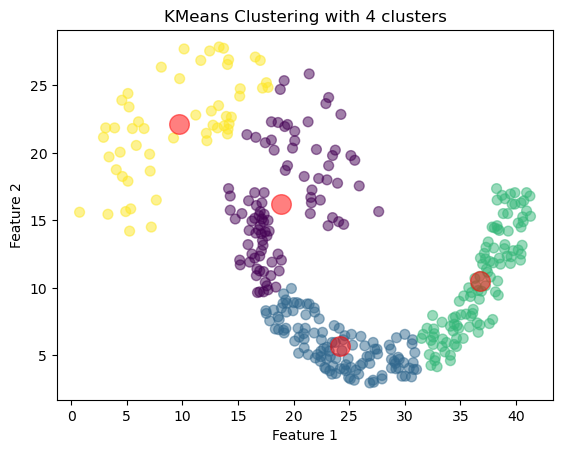

In [28]:
X2 = jain_df.drop(jain_df.columns[-1], axis=1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)

y_kmeans = kmeans.predict(X2)

# Visualize the clusters
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


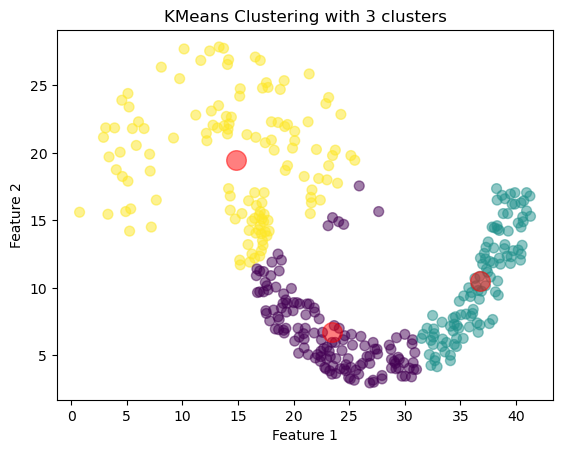

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2)

y_kmeans = kmeans.predict(X2)

# Visualize the clusters
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

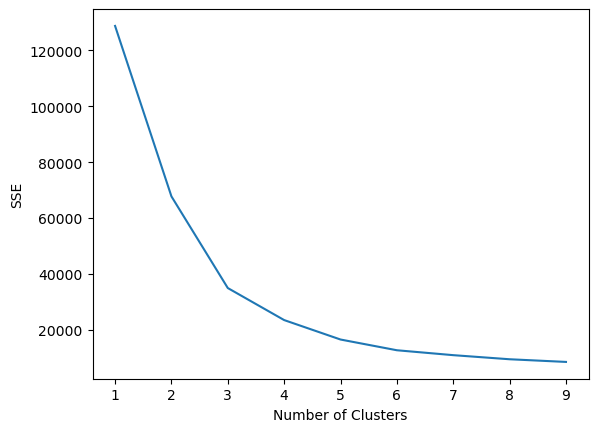

In [30]:
sse = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

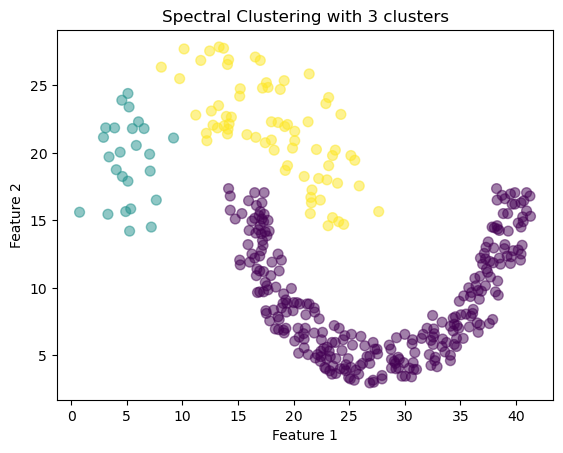

In [31]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X2)

# Visualize the clusters
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 3 clusters')
plt.show()

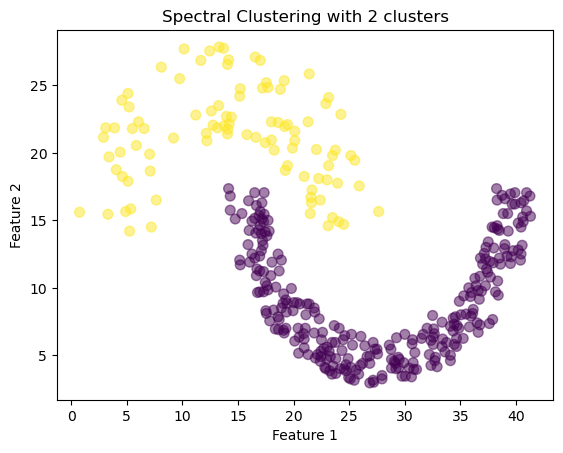

In [32]:
spectral = SpectralClustering(n_clusters=2)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X2)

# Visualize the clusters
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 2 clusters')
plt.show()

## DBSCAN

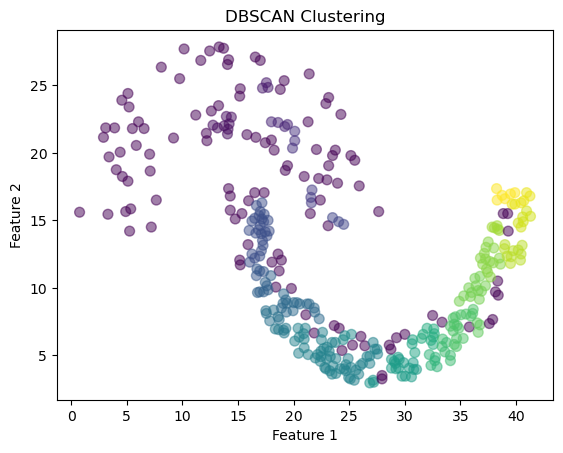

In [33]:
dbscan = DBSCAN(eps=0.71, min_samples=3)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X2)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

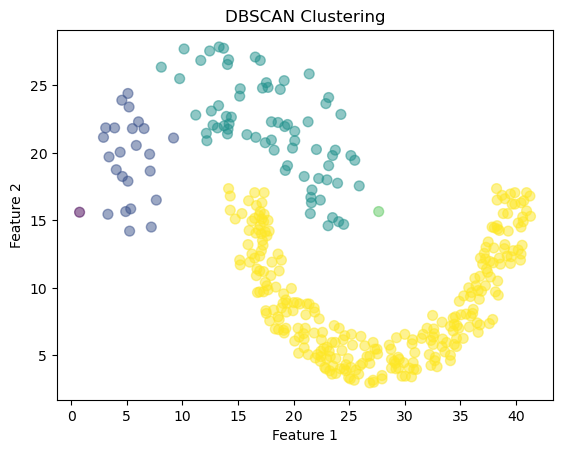

In [34]:
# Instantiate DBSCAN with specified hyperparameters
dbscan = DBSCAN(eps=2.5, min_samples=1)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X2)
# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

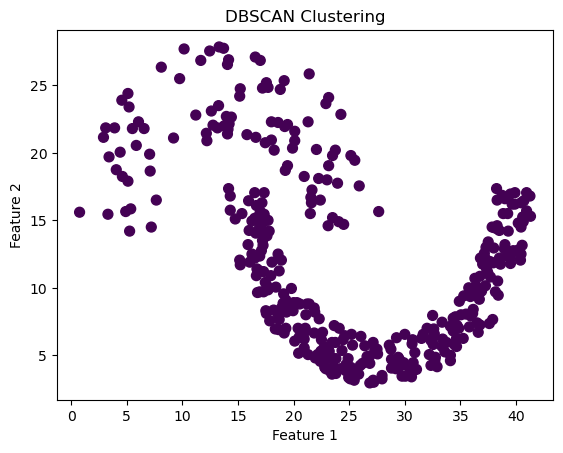

In [35]:
dbscan = DBSCAN(eps=0.3, min_samples=7)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X2)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial

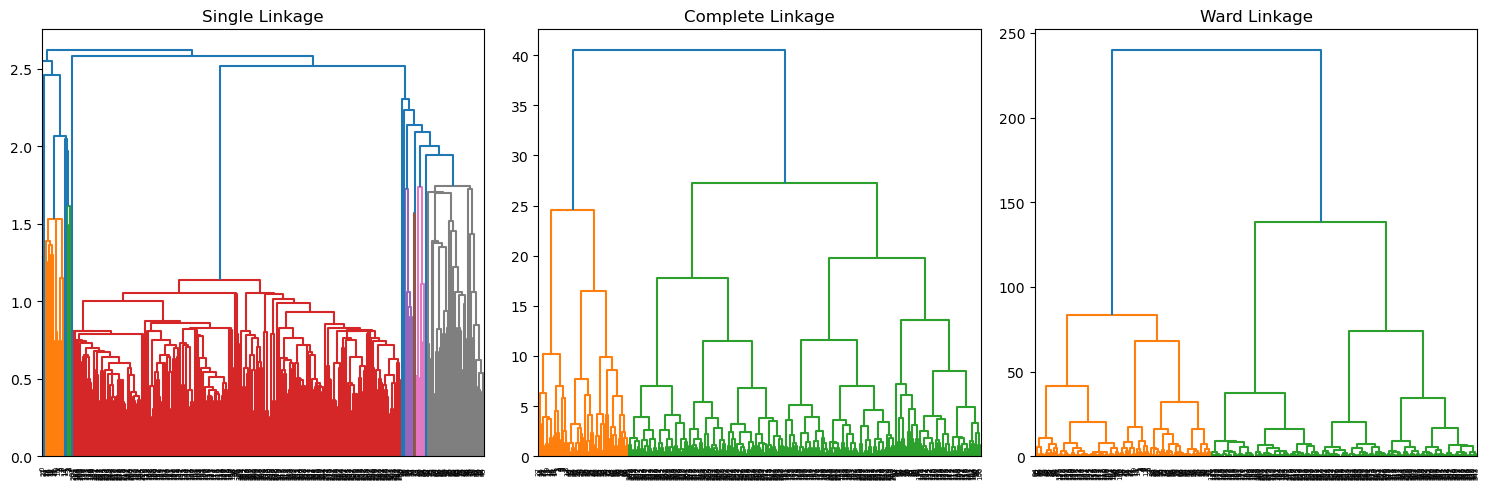

In [36]:
from scipy.cluster import hierarchy

linkage_methods = ['single', 'complete', 'ward']

# Plot dendrograms for different linkage methods
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, method in enumerate(linkage_methods):
    Z = hierarchy.linkage(X2, method=method)
    hierarchy.dendrogram(Z, ax=axes[i])
    axes[i].set_title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

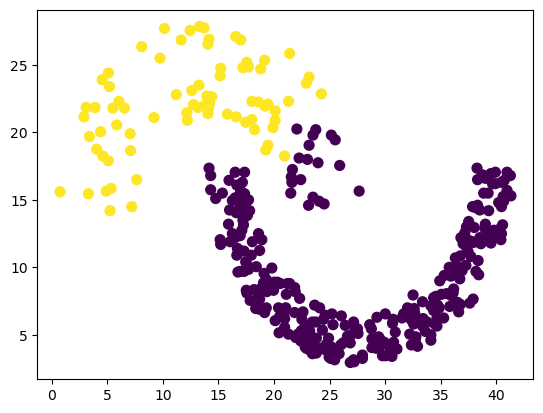

In [37]:
X2 = np.array(X2)
hc = AgglomerativeClustering(n_clusters = 2, linkage='complete')
y_hc = hc.fit_predict(X2)
fig, ax = plt.subplots(1)
ax.scatter(X2[:,0], X2[:,1], c=y_hc, s=50)

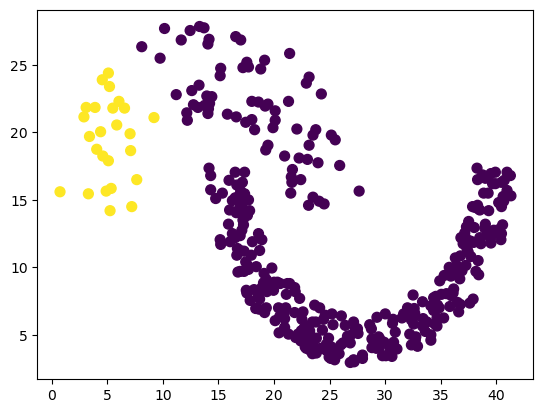

In [38]:
X2 = np.array(X2)
hc = AgglomerativeClustering(n_clusters = 2, linkage='single')
y_hc = hc.fit_predict(X2)
fig, ax = plt.subplots(1)
ax.scatter(X2[:,0], X2[:,1], c=y_hc, s=50)

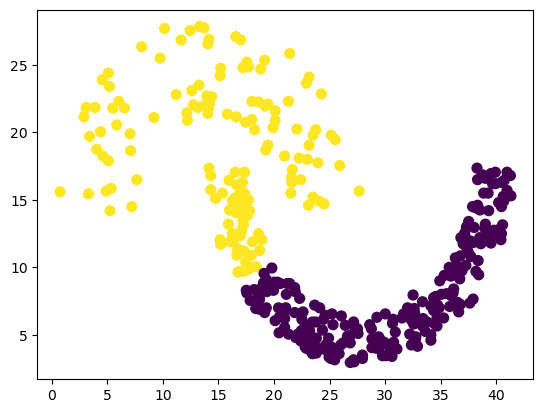

In [39]:
X2 = np.array(X2)
hc = AgglomerativeClustering(n_clusters = 2, linkage='ward')
y_hc = hc.fit_predict(X2)
fig, ax = plt.subplots(1)
ax.scatter(X2[:,0], X2[:,1], c=y_hc, s=50)

## Gaussian Mixture

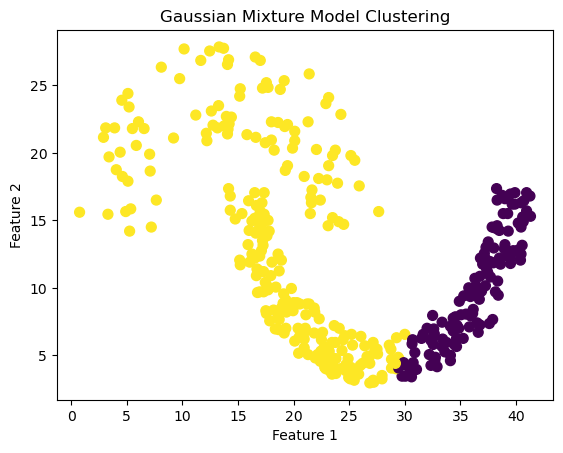

In [40]:
X2 = np.asarray(X2)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X2)

# Predict the cluster labels
y_gmm = gmm.predict(X2)

# Plot the clustered data
plt.scatter(X2[:, 0], X2[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

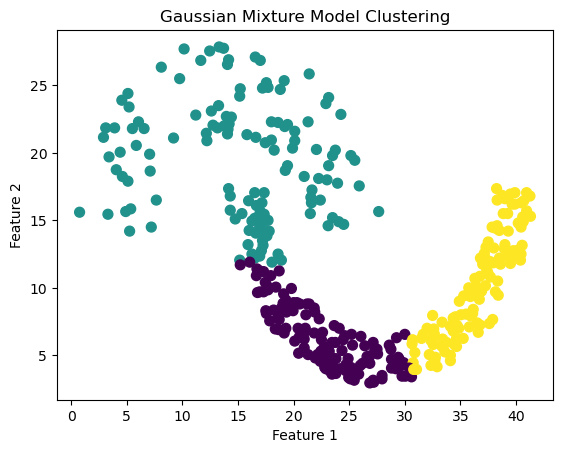

In [41]:
X2 = np.asarray(X2)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X2)

# Predict the cluster labels
y_gmm = gmm.predict(X2)

# Plot the clustered data
plt.scatter(X2[:, 0], X2[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# R15 Data

## kMeans

In [42]:
X3 = R15_df.drop(R15_df.columns[-1], axis=1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X3)

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

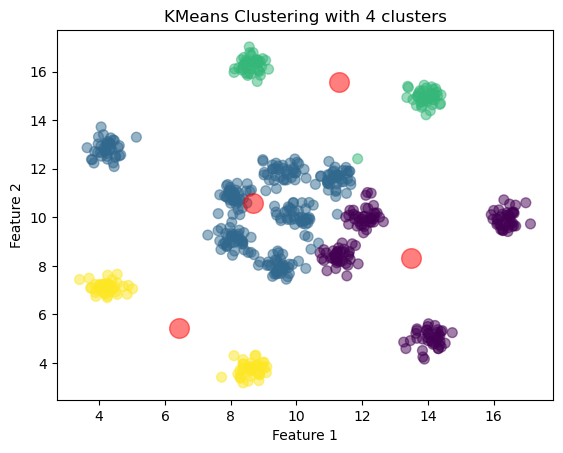

In [43]:
y_kmeans = kmeans.predict(X3)
# Visualize the clusters along with centroids
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

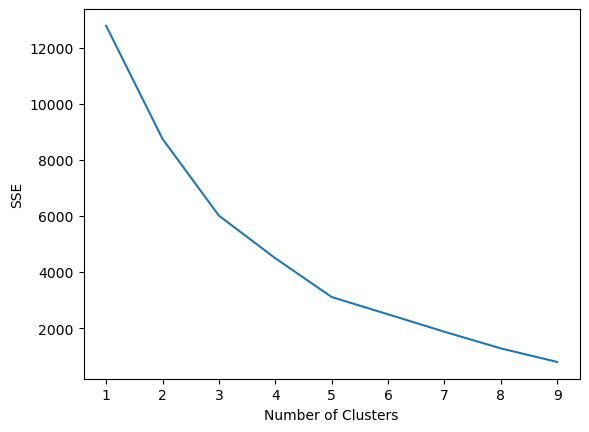

In [44]:
sse = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X3)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


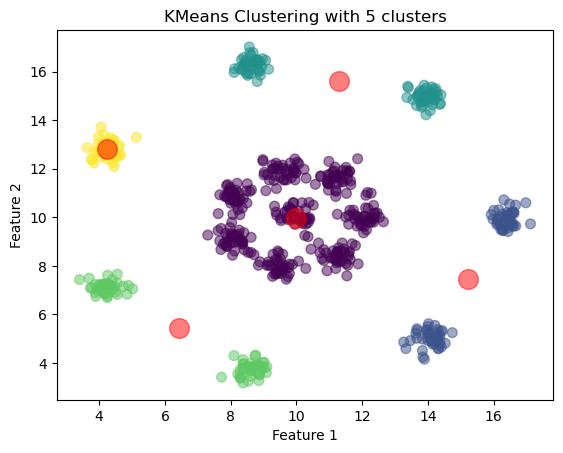

In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3)

y_kmeans = kmeans.predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 5 clusters')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


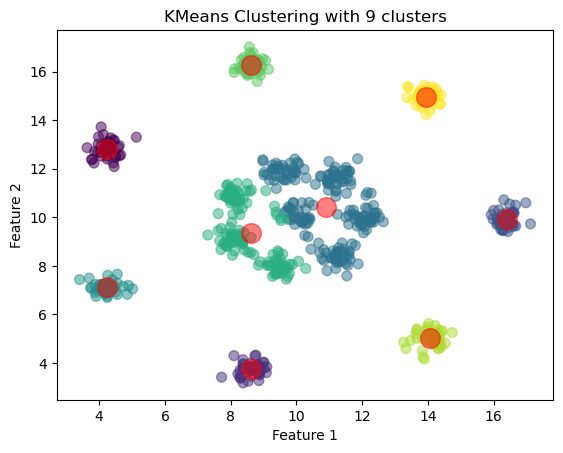

In [46]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X3)

y_kmeans = kmeans.predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 9 clusters')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


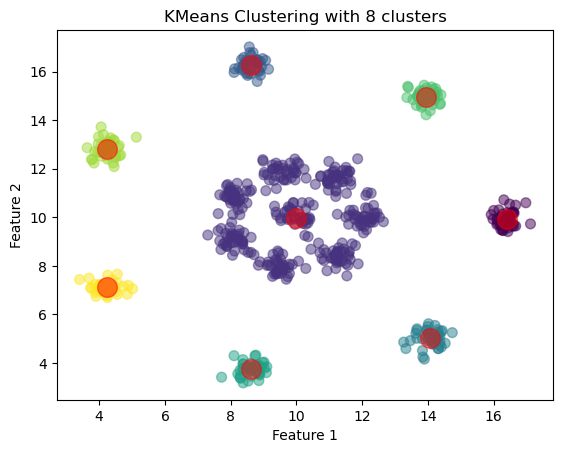

In [47]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X3)

y_kmeans = kmeans.predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 8 clusters')
plt.show()

## Spectral Clustering

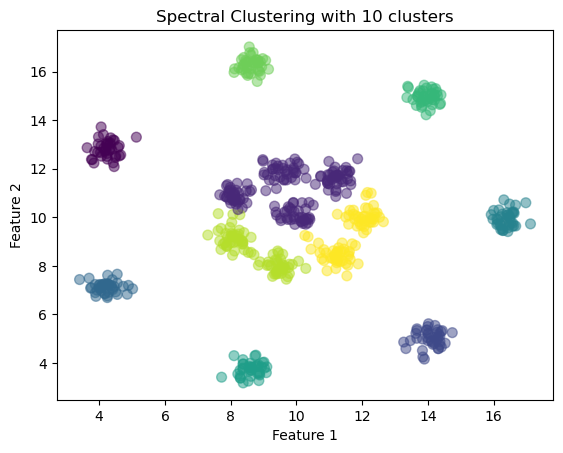

In [48]:
spectral = SpectralClustering(n_clusters=10)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 10 clusters')
plt.show()

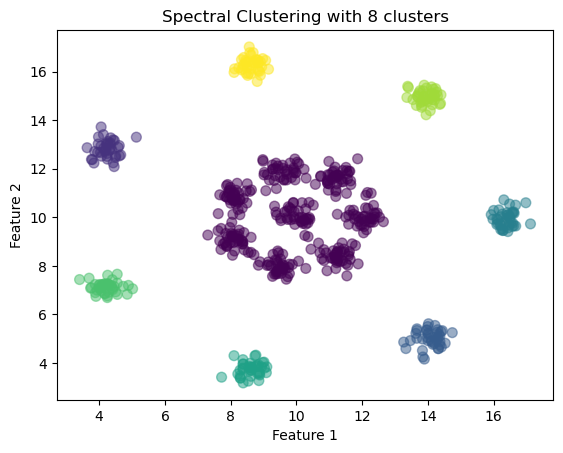

In [49]:
spectral = SpectralClustering(n_clusters=8)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 8 clusters')
plt.show()

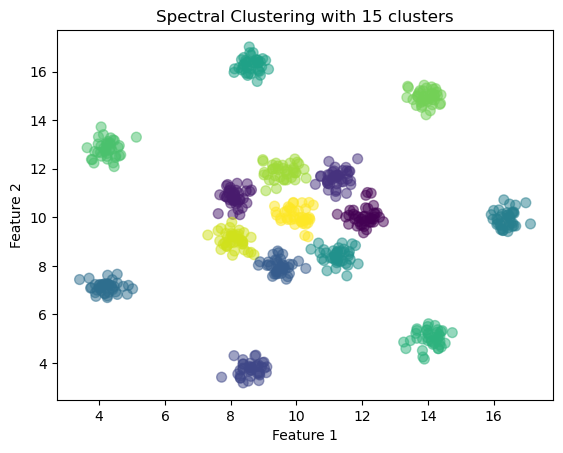

In [50]:
spectral = SpectralClustering(n_clusters=15)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X3)

# Visualize the clusters
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 15 clusters')
plt.show()

## DBSCAN

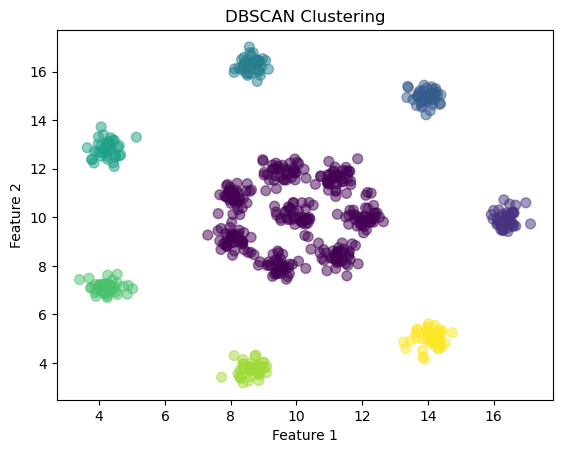

In [51]:
dbscan = DBSCAN(eps=0.71, min_samples=3)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

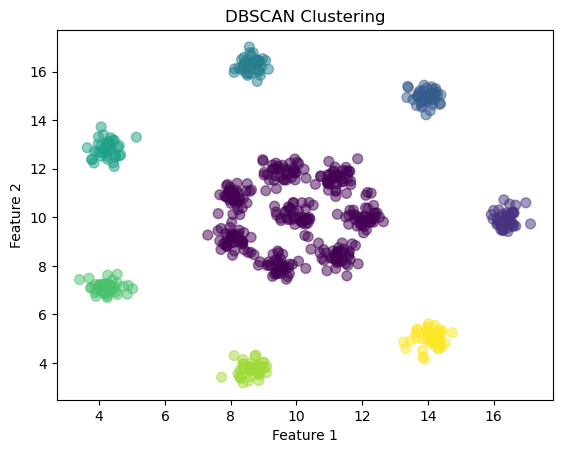

In [52]:
dbscan = DBSCAN(eps=0.71, min_samples=5)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

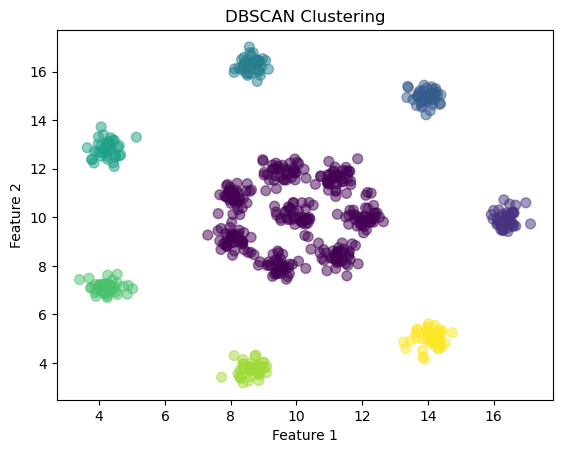

In [53]:
dbscan = DBSCAN(eps=0.71, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

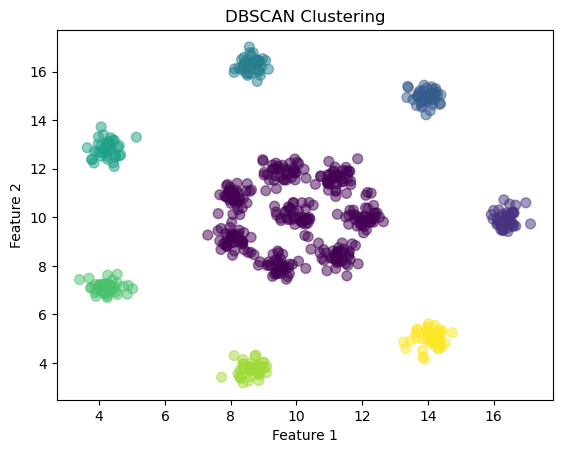

In [54]:
dbscan = DBSCAN(eps=1, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

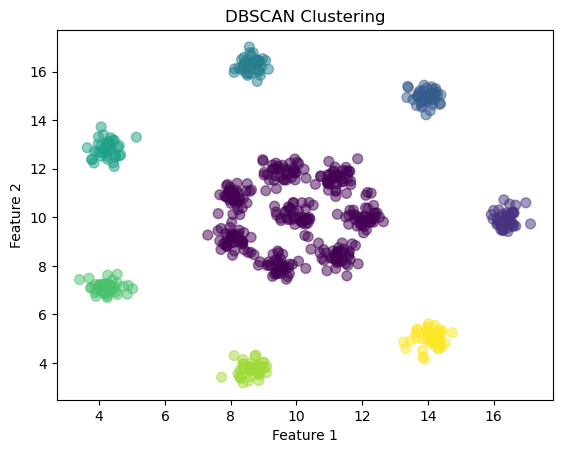

In [55]:
dbscan = DBSCAN(eps=2, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

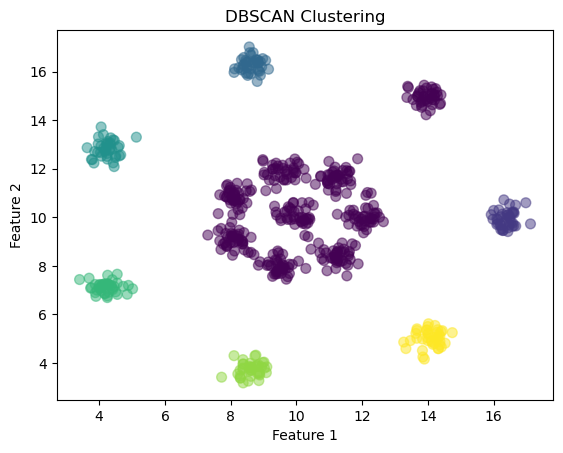

In [56]:
dbscan = DBSCAN(eps=3, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

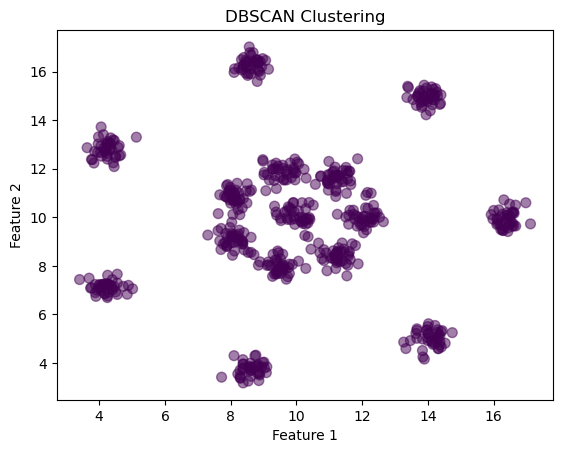

In [57]:
dbscan = DBSCAN(eps=3.5, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

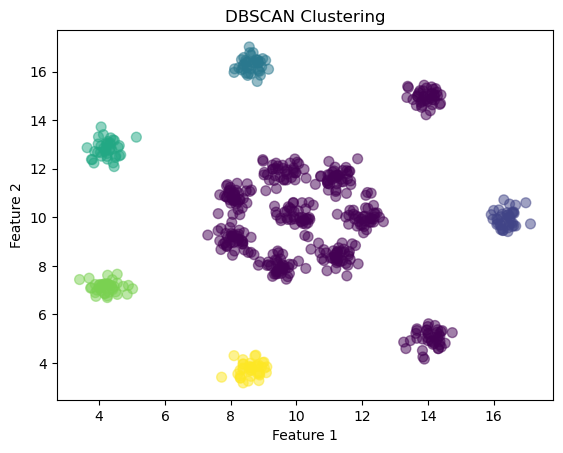

In [58]:
dbscan = DBSCAN(eps=3.1, min_samples=8)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X3)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial 

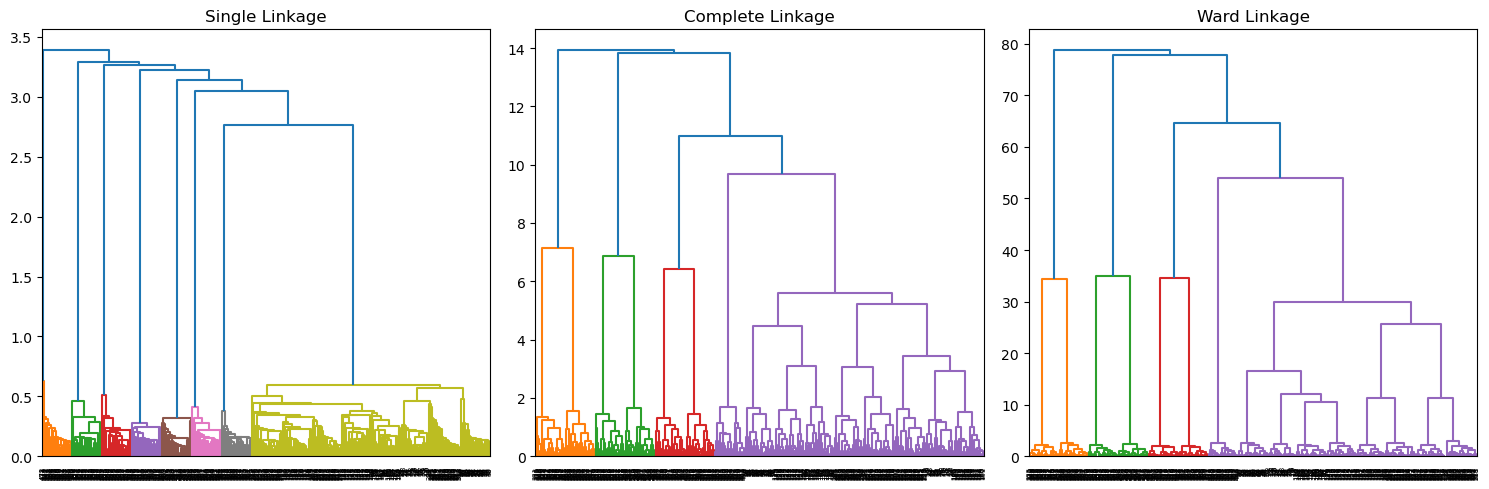

In [59]:
from scipy.cluster import hierarchy

linkage_methods = ['single', 'complete', 'ward']

# Plot dendrograms for different linkage methods
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, method in enumerate(linkage_methods):
    Z = hierarchy.linkage(X3, method=method)
    hierarchy.dendrogram(Z, ax=axes[i])
    axes[i].set_title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

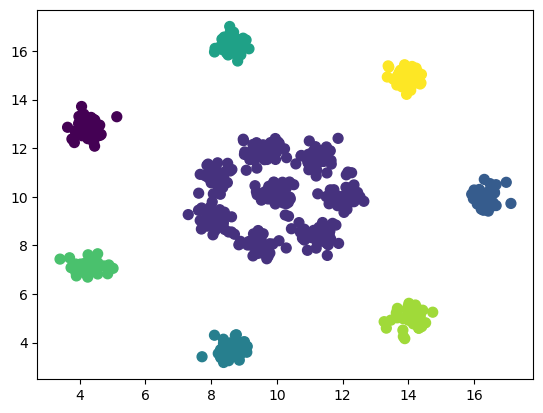

In [60]:
X3 = np.array(X3)
hc = AgglomerativeClustering(n_clusters = 8, linkage='single')
y_hc = hc.fit_predict(X3)
fig, ax = plt.subplots(1)
ax.scatter(X3[:,0], X3[:,1], c=y_hc, s=50)

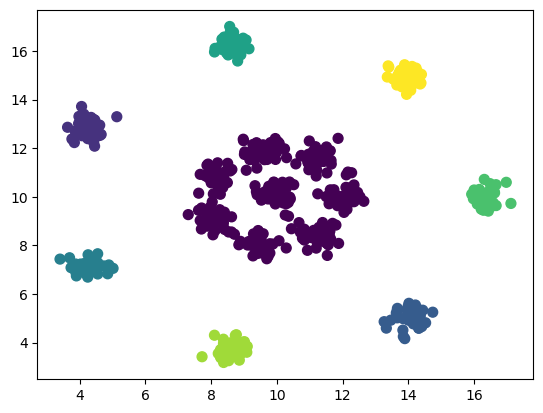

In [61]:
X3 = np.array(X3)
hc = AgglomerativeClustering(n_clusters = 8, linkage='complete')
y_hc = hc.fit_predict(X3)
fig, ax = plt.subplots(1)
ax.scatter(X3[:,0], X3[:,1], c=y_hc, s=50)

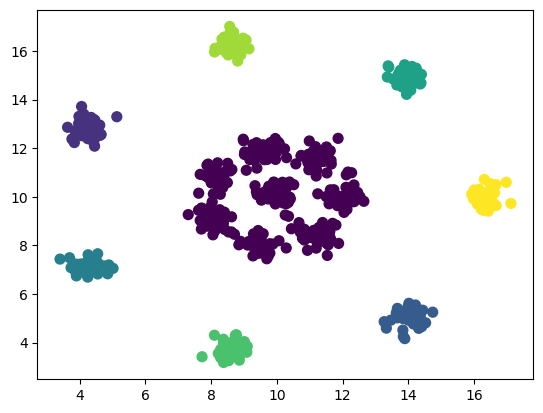

In [62]:
X3 = np.array(X3)
hc = AgglomerativeClustering(n_clusters = 8, linkage='ward')
y_hc = hc.fit_predict(X3)
fig, ax = plt.subplots(1)
ax.scatter(X3[:,0], X3[:,1], c=y_hc, s=50)

## Guassian Mixture

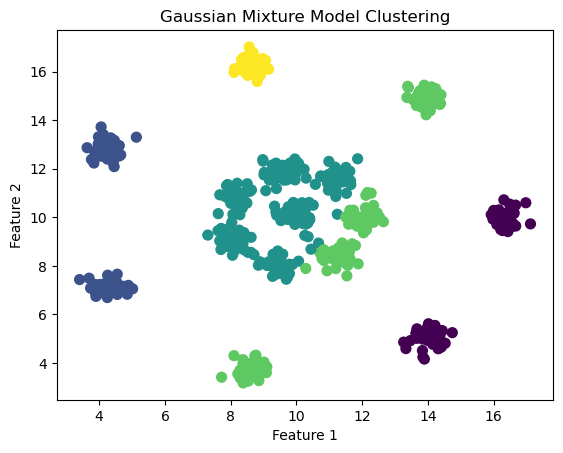

In [63]:
X3 = np.asarray(X3)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(X3)

# Predict the cluster labels
y_gmm = gmm.predict(X3)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

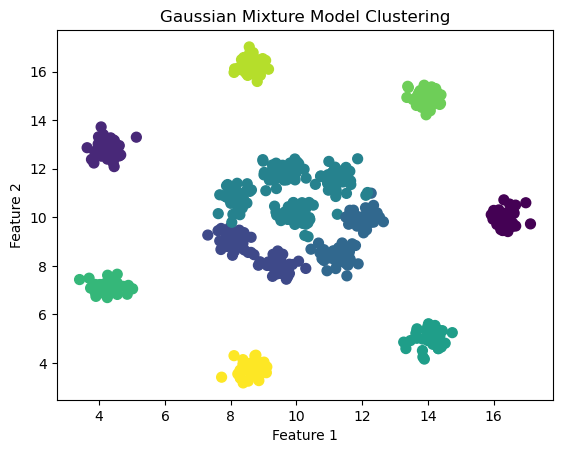

In [64]:
X3 = np.asarray(X3)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=10, random_state=0)
gmm.fit(X3)

# Predict the cluster labels
y_gmm = gmm.predict(X3)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

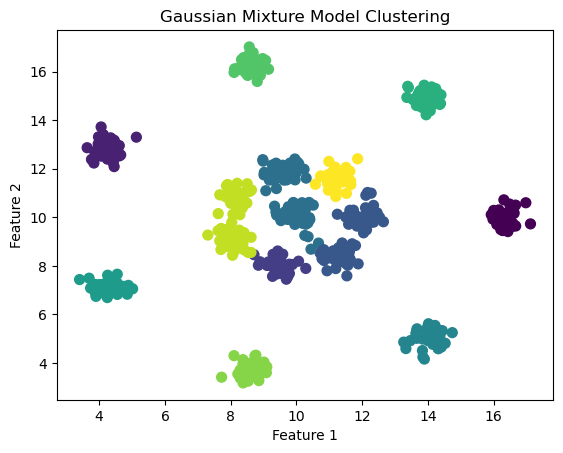

In [65]:
X3 = np.asarray(X3)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=12, random_state=0)
gmm.fit(X3)

# Predict the cluster labels
y_gmm = gmm.predict(X3)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

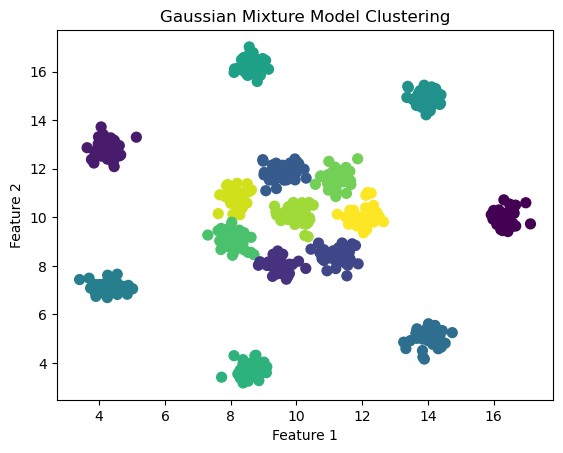

In [66]:
X3 = np.asarray(X3)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=15, random_state=0)
gmm.fit(X3)

# Predict the cluster labels
y_gmm = gmm.predict(X3)

# Plot the clustered data
plt.scatter(X3[:, 0], X3[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Circle Data

## kMeans

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


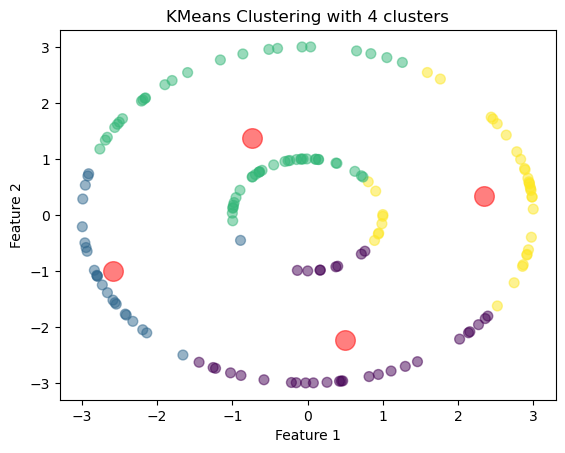

In [67]:
X4 = circle_df
kmeans = KMeans(n_clusters=4)
kmeans.fit(X4)

y_kmeans = kmeans.predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

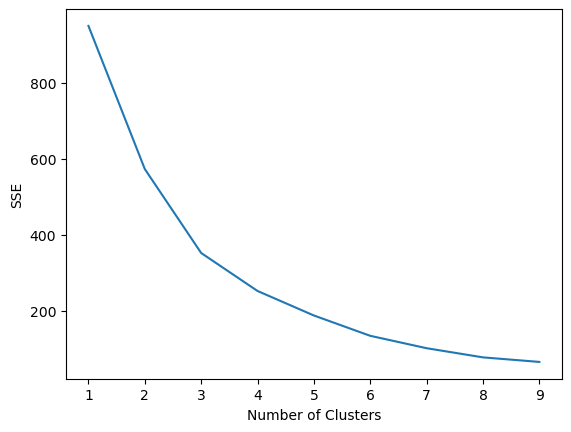

In [68]:
sse = []

for i in range(1,10):
    
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X4)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


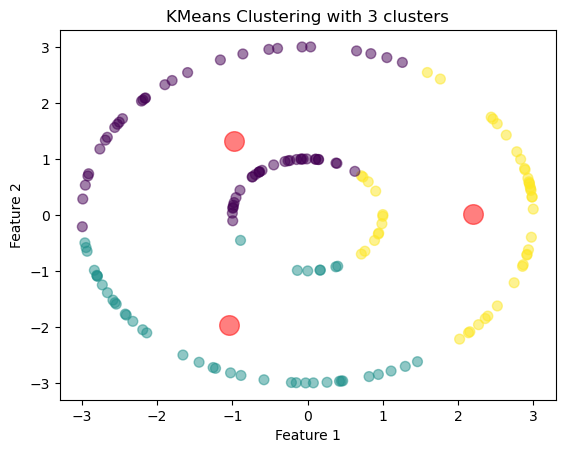

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X4)

y_kmeans = kmeans.predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


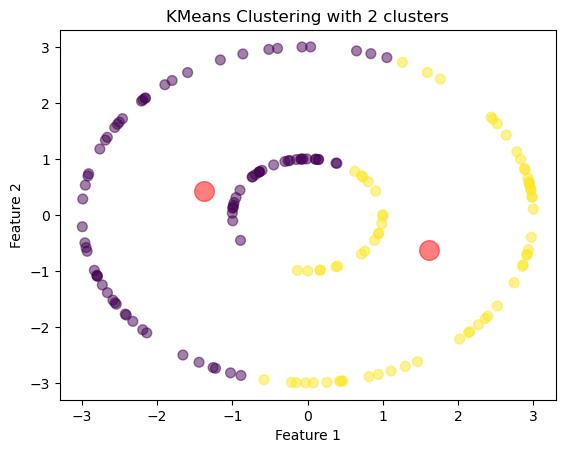

In [70]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X4)

y_kmeans = kmeans.predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Plot centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

## Spectral Clustering

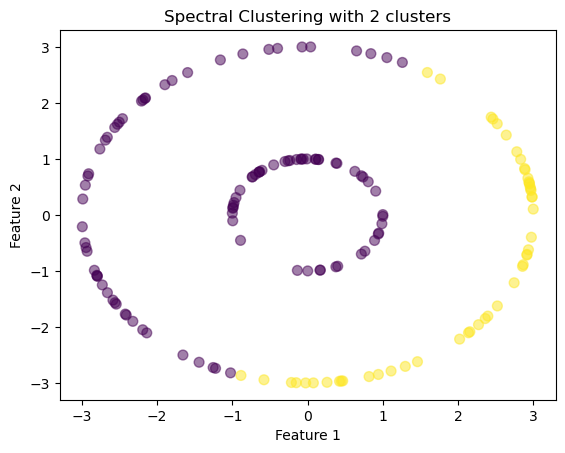

In [71]:
spectral = SpectralClustering(n_clusters=2)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 2 clusters')
plt.show()

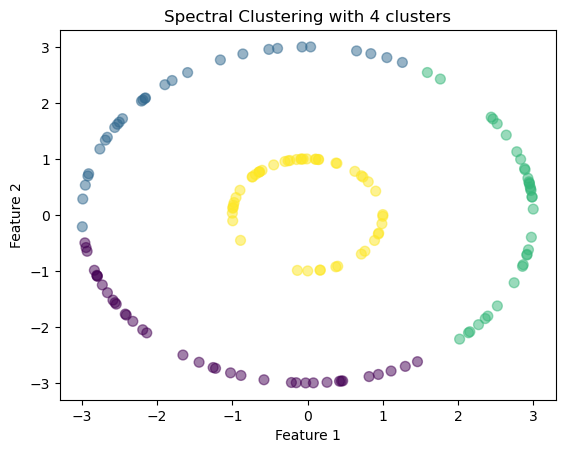

In [72]:
spectral = SpectralClustering(n_clusters=4)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 4 clusters')
plt.show()

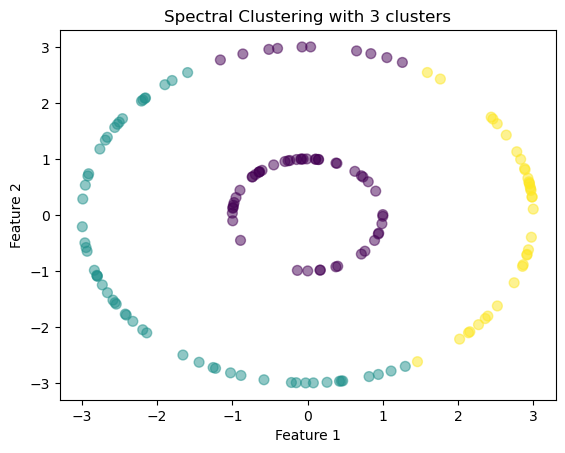

In [73]:
spectral = SpectralClustering(n_clusters=3)
# fit model and predict clusters
y_spectral = spectral.fit_predict(X4)

# Visualize the clusters
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_spectral, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering with 3 clusters')
plt.show()

## DBSCAN

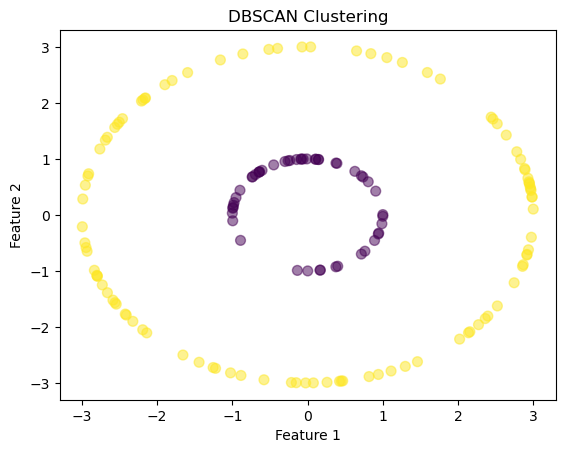

In [74]:
dbscan = DBSCAN(eps=0.71, min_samples=2)
# fit model and predict clusters
y_dbscan = dbscan.fit_predict(X4)

# Visualize the clusters
# Plot points that belong to a cluster
plt.scatter(X4.iloc[:, 0], X4.iloc[:, 1], c=y_dbscan, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

## Hierarchial

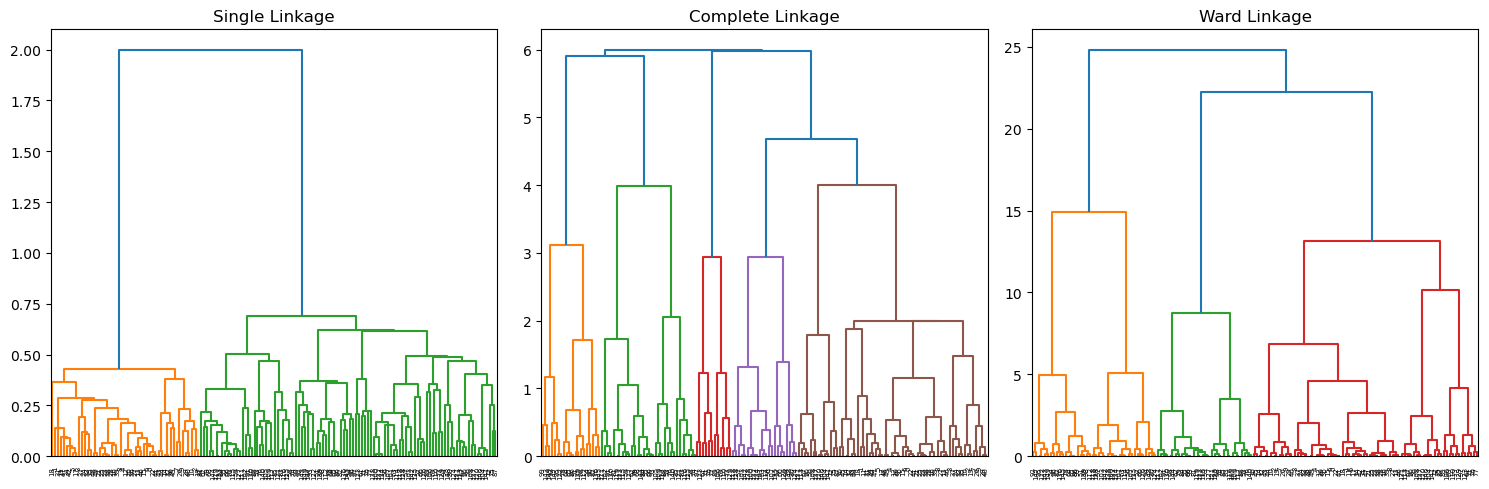

In [75]:
from scipy.cluster import hierarchy

linkage_methods = ['single', 'complete', 'ward']

# Plot dendrograms for different linkage methods
fig, axes = plt.subplots(1, len(linkage_methods), figsize=(15, 5))

for i, method in enumerate(linkage_methods):
    Z = hierarchy.linkage(X4, method=method)
    hierarchy.dendrogram(Z, ax=axes[i])
    axes[i].set_title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

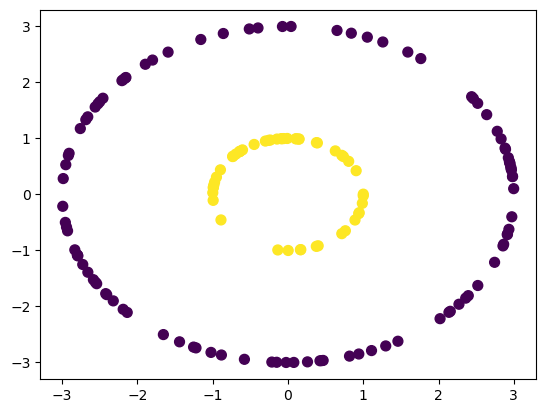

In [76]:
X4 = np.array(X4)
hc = AgglomerativeClustering(n_clusters = 2, linkage='single')
y_hc = hc.fit_predict(X4)
fig, ax = plt.subplots(1)
ax.scatter(X4[:,0], X4[:,1], c=y_hc, s=50)

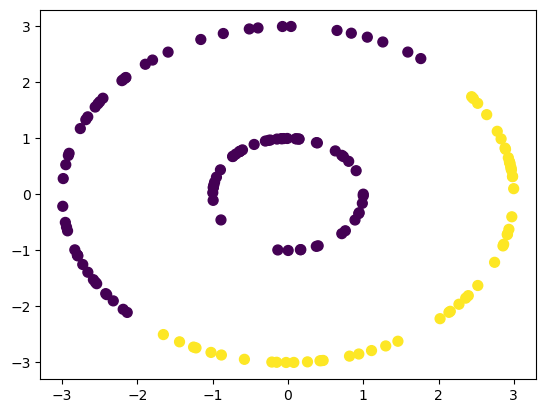

In [77]:
X4 = np.array(X4)
hc = AgglomerativeClustering(n_clusters = 2, linkage='complete')
y_hc = hc.fit_predict(X4)
fig, ax = plt.subplots(1)
ax.scatter(X4[:,0], X4[:,1], c=y_hc, s=50)

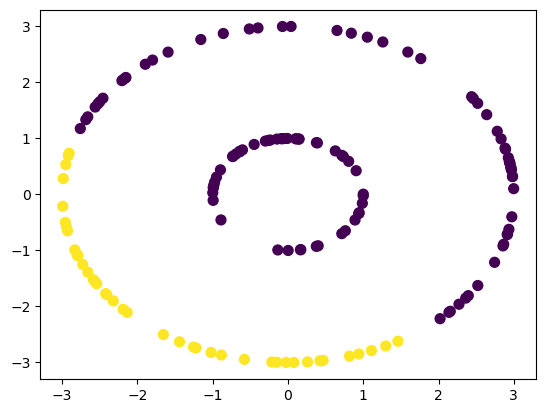

In [78]:
X4 = np.array(X4)
hc = AgglomerativeClustering(n_clusters = 2, linkage='ward')
y_hc = hc.fit_predict(X4)
fig, ax = plt.subplots(1)
ax.scatter(X4[:,0], X4[:,1], c=y_hc, s=50)

## Guassian Mixture

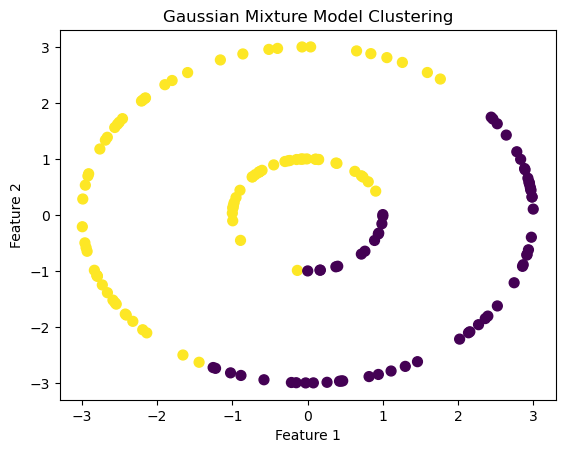

In [79]:
X4 = np.asarray(X4)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X4)

# Predict the cluster labels
y_gmm = gmm.predict(X4)

# Plot the clustered data
plt.scatter(X4[:, 0], X4[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

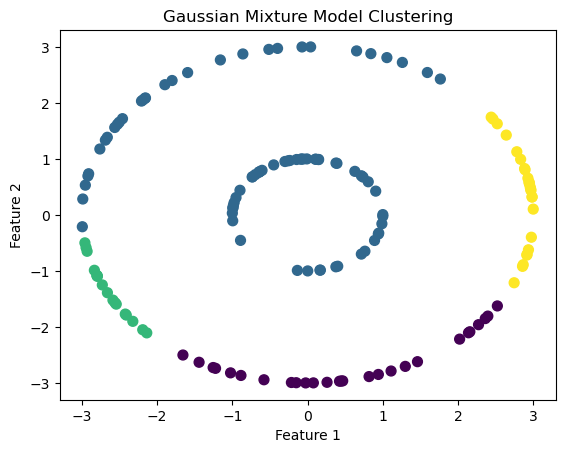

In [80]:
X4 = np.asarray(X4)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X4)

# Predict the cluster labels
y_gmm = gmm.predict(X4)

# Plot the clustered data
plt.scatter(X4[:, 0], X4[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

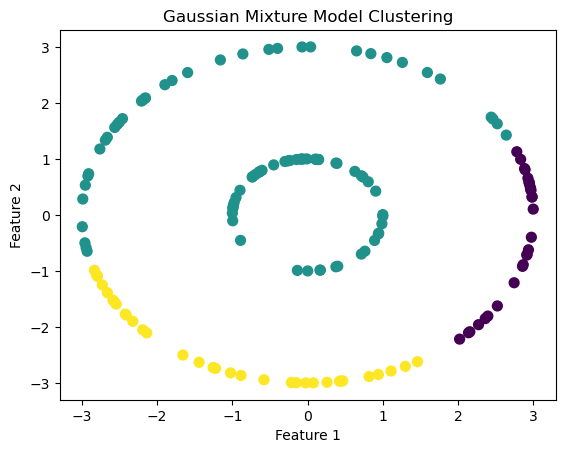

In [81]:
X4 = np.asarray(X4)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X4)

# Predict the cluster labels
y_gmm = gmm.predict(X4)

# Plot the clustered data
plt.scatter(X4[:, 0], X4[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anshikakhandelwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

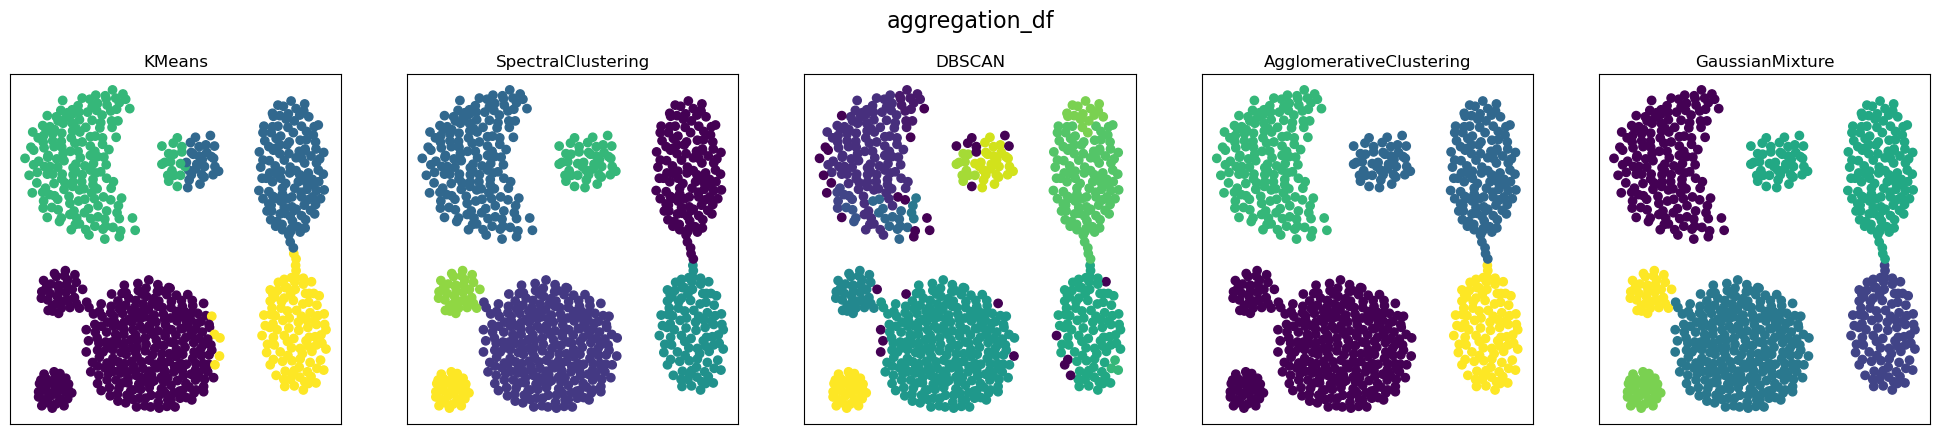

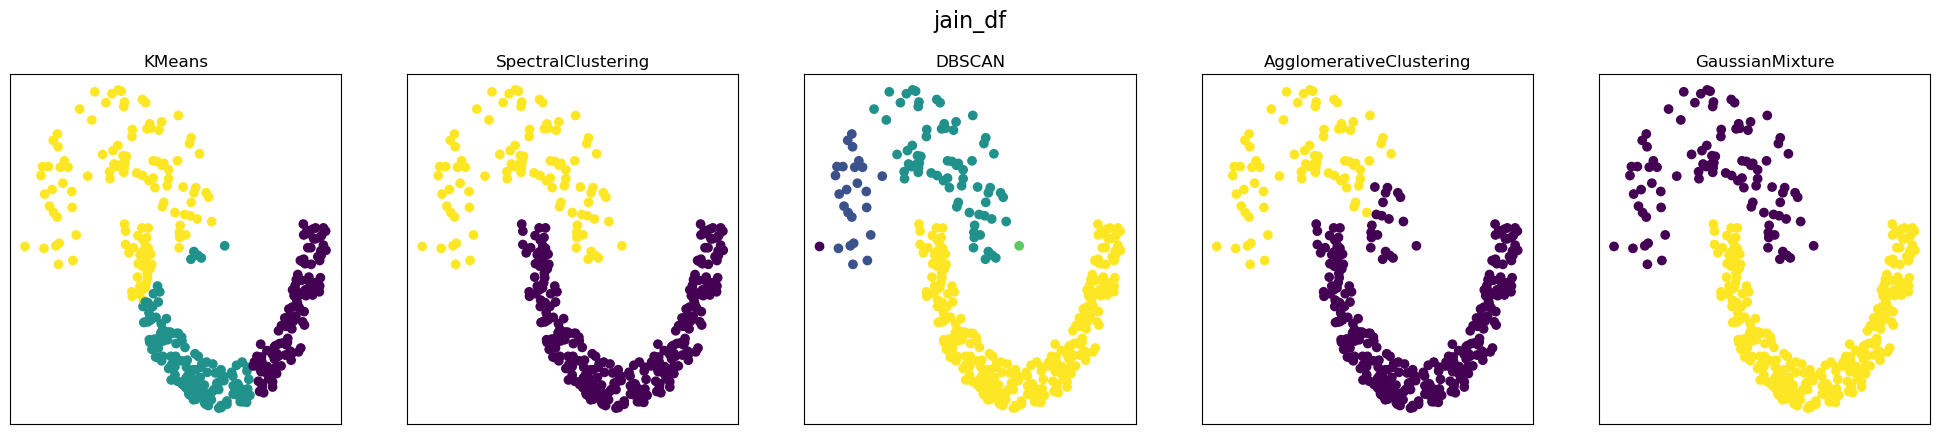

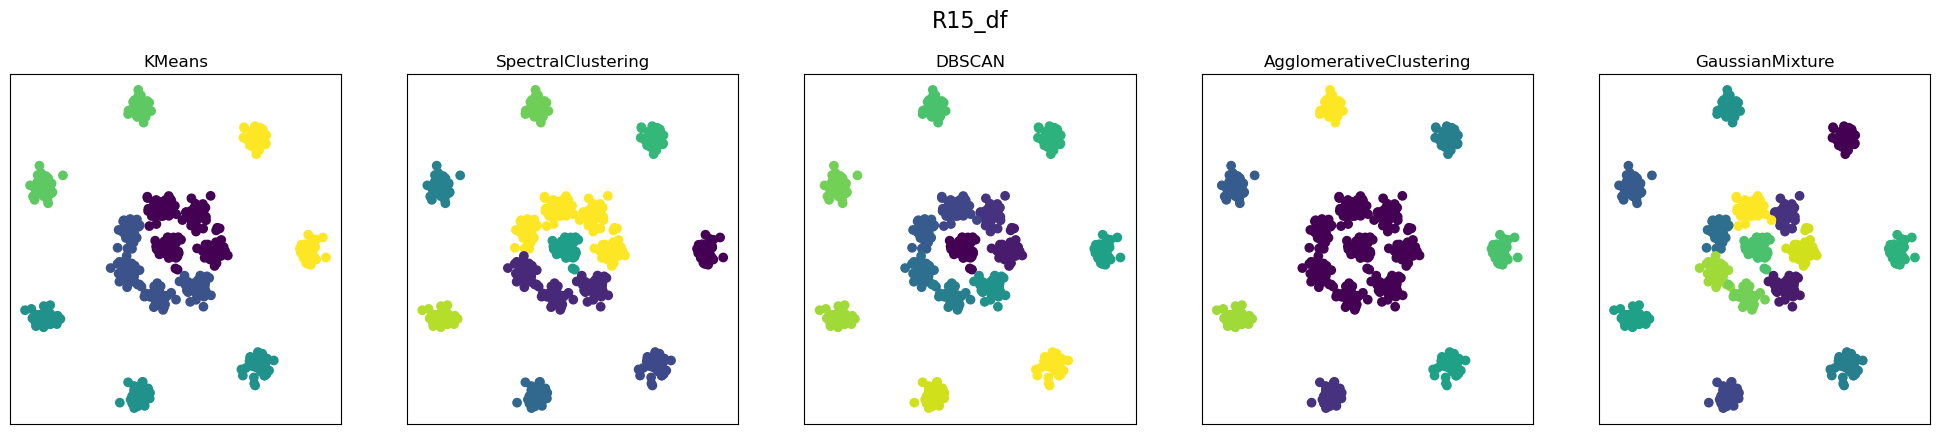

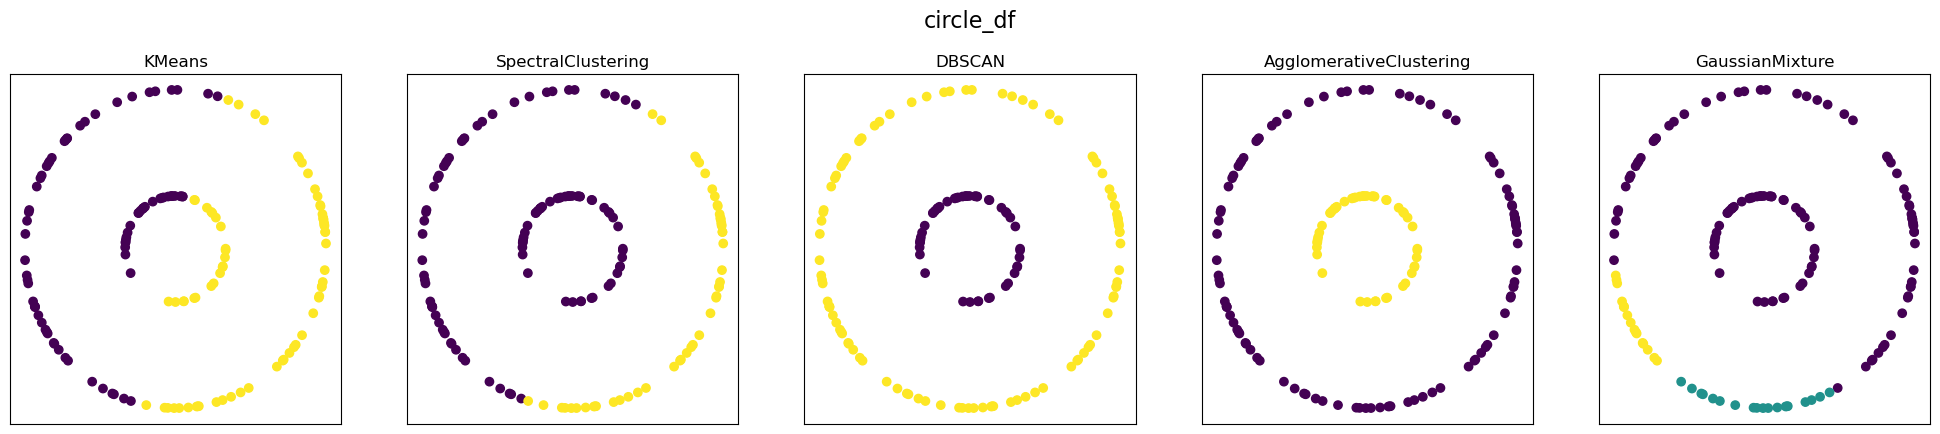

In [82]:
# visualisation code modified from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Ensure data is in numpy array format to prevent errors 
datasets = {
    'aggregation_df': aggregation_df.values if isinstance(aggregation_df, pd.DataFrame) else aggregation_df,
    'jain_df': jain_df.values if isinstance(jain_df, pd.DataFrame) else jain_df,
    'R15_df': R15_df.values if isinstance(R15_df, pd.DataFrame) else R15_df,
    'circle_df': circle_df.values if isinstance(circle_df, pd.DataFrame) else circle_df
}

# Dictionary to map model names to their corresponding models
models = {
    'KMeans': KMeans,
    'SpectralClustering': SpectralClustering,
    'DBSCAN': DBSCAN,
    'AgglomerativeClustering': AgglomerativeClustering,
    'GaussianMixture': GaussianMixture
}

# Dictionary to store hyperparameters for each model and dataset
hyperparameters = {
    'aggregation_df': {
        'KMeans': {'n_clusters': 4},
        'SpectralClustering': {'n_clusters': 7},
        'DBSCAN': {'eps': 0.9, 'min_samples': 3},
        'AgglomerativeClustering': {'n_clusters': 4, 'linkage': 'complete'},
        'GaussianMixture': {'n_components': 6}
    },
    'jain_df': {
        'KMeans': {'n_clusters': 3},
        'SpectralClustering': {'n_clusters': 2},
        'DBSCAN': {'eps': 2.5, 'min_samples': 1},
        'AgglomerativeClustering': {'n_clusters': 2, 'linkage': 'complete'},
        'GaussianMixture': {'n_components': 2}
    },
    'R15_df': {
        'KMeans': {'n_clusters': 5},
        'SpectralClustering': {'n_clusters': 10},
        'DBSCAN': {'eps': 0.71, 'min_samples': 8},
        'AgglomerativeClustering': {'n_clusters': 8, 'linkage': 'single'},
        'GaussianMixture': {'n_components': 15}
    },
    'circle_df': {
        'KMeans': {'n_clusters': 2},
        'SpectralClustering': {'n_clusters': 2},
        'DBSCAN': {'eps': 0.71, 'min_samples': 2},
        'AgglomerativeClustering': {'n_clusters': 2, 'linkage': 'single'},
        'GaussianMixture': {'n_components': 3}
    }
}

# Function to perform clustering for a given dataset and model
def perform_clustering(data, model_name, hyperparams):
    model_class = models[model_name]
    clustering_model = model_class(**hyperparams).fit(data)
    return clustering_model

# Perform clustering for each dataset and model
clustering_results = {}
for dataset_name, dataset in datasets.items():
    results_for_dataset = []
    for model_name, hyperparams in hyperparameters[dataset_name].items():
        clustering_model = perform_clustering(dataset, model_name, hyperparams)
        results_for_dataset.append(clustering_model)
    clustering_results[dataset_name] = results_for_dataset

# Function to create visualization for a single dataset and all models
def visualize_dataset(dataset_name, results):
    fig, axs = plt.subplots(1, len(models), figsize=(20, 5))
    fig.suptitle(dataset_name, fontsize=16)
    fig.subplots_adjust(left=0.02, right=0.98, bottom=0.15, top=0.85, wspace=0.2, hspace=0.3)

    for i, (model_name, clustering_model) in enumerate(zip(models.keys(), results)):
        ax = axs[i]
        if model_name == 'DBSCAN':
            labels = clustering_model.fit_predict(datasets[dataset_name])
        elif model_name == 'GaussianMixture':
            labels = clustering_model.predict(datasets[dataset_name])
        else:
            labels = clustering_model.labels_

        # Plotting the data points and coloring them based on cluster labels
        scatter = ax.scatter(datasets[dataset_name][:, 0], datasets[dataset_name][:, 1], c=labels, cmap='viridis')
        ax.set_title(model_name)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Visualize each dataset with all models
for dataset_name, results in clustering_results.items():
    visualize_dataset(dataset_name, results)


# Hyperparameter selection and Reasoning:
To decide on the optimal hyperparameters for the models, I incrementally modified the values and visualized the results. Here’s a detailed explanation for each model:

- KMeans Clustering:

Method: I used the 'elbow method' to determine the number of clusters (n_clusters).
Process: I plotted the Sum of Squared Errors (SSE) against the number of clusters. The point where the plot showed the most significant bend (elbow) was chosen as the optimal number of clusters. This point indicates diminishing returns in the reduction of SSE with the addition of more clusters.

- Spectral Clustering:

Method: Trial and error based on visualization.
Process: I started with an arbitrary number of clusters and adjusted (incremented/decremented) the number until the visualized clusters looked as accurate and distinct as possible.

- DBSCAN:

Method: Trial and error based on visualization results.
Process: I first modified the eps value (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and then adjusted the min_samples (the number of samples in a neighborhood for a point to be considered as a core point) based on how well-defined the clusters appeared in the visualization.

- Agglomerative Clustering:

Method: Dendrogram analysis.
Process: I plotted dendrograms for different linkage methods (single, complete, average, ward). By analyzing the dendrograms:
I determined the number of clusters by looking for the largest vertical distance between two horizontal lines that did not intersect any other horizontal lines.
Alternatively, I counted the number of colors minus one.
For the linkage method, I selected the one that produced the best visual separation of clusters in the dendrogram and subsequent cluster visualization.

- Gaussian Mixture Model (GMM):

Method: Trial and error based on visualization.
Process: Similar to Spectral Clustering, I started with an arbitrary number of clusters (n_components) and adjusted the number based on the visual quality of the clustering results. I looked for a number that provided clear and distinct clusters.

## Hyperparameters Used
KMeans (n_clusters):
- aggregation = 4
- Jain = 3
- R15 = 5
- Circle = 2

Spectral (n_clusters):
- aggregation = 7
- Jain = 2
- R15 = 10
- Circle = 2

DBSCAN (eps, min_samples):
- aggregation = 0.9, 2
- Jain = 2.5, 1
- R15 = 0.71, 8
- Circle = 0.71, 2

Agglomerative Clustering (n_clusters, linkage):
- aggregation = 4, complete
- Jain = 2, complete
- R15 = 8, single
- Circle = 2, single

Guassian Mixture (n_clusters):
- aggregation = 6
- Jain = 2
- R15 = 15
- Circle = 3

## Theory behind Guassian Mixture 

A Gaussian Mixture Model for clustering assumes that the data points are generated from a mixture of several Gaussian distributions, each representing a different cluster. 

Whereas a method like kMeans assigns each point to exactly one cluster, GMMs provide a probabilistic assignment of points to clusters.

These are the steps behind Guassian Mixture models:
1. Initialization:
Start with initial guesses for the parameters of the Gaussian distributions (e.g., their centers, spreads, and shapes).

2. Iterative Refinement:
The algorithm iteratively improves these guesses to better fit the data.
In each iteration, the algorithm adjusts the parameters so that the Gaussian distributions better capture the structure of the data.

3. Cluster Assignment:
After the iterations, each data point is assigned to the cluster (Gaussian distribution) where it has the highest probability of belonging.
You end up with a clustering where each point is assigned to a cluster based on the best-fitting Gaussian distribution.